This is a Julian fork of the 12 steps to Navier-Stokes (Python) [https://github.com/barbagroup/CFDPython] by Lorena A. Barba, Gilbert F. Forsyth . All content of that work is under Creative Commons Attribution CC-BY 4.0, and all python code is under BSD-3 clause. This work also derives from similar forks by Cysor [https://github.com/Cysor/CFDJulia] and by Wallace-dyfq [https://github.com/Wallace-dyfq/CFD-Julia-12-steps--o-Navier-Stokes-Equations]

Step 7: 2D Diffusion
----
***

And here is the 2D-diffusion equation:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

You will recall that we came up with a method for discretizing second order derivatives in Step 3, when investigating 1-D diffusion.  We are going to use the same scheme here, with our forward difference in time and two second-order derivatives. 

$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

Once again, we reorganize the discretized equation and solve for $u_{i,j}^{n+1}$

$$u_{i,j}^{n+1} = u_{i,j}^n + \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)$$

In [1]:
using Plots


nx = 101
ny = 101
    
ν  = 0.2
    
Δx = 2.0 / (nx - 1)
Δy = 2.0 / (ny - 1)
    
σ  = 0.25
Δt = σ * Δx * Δy / ν

x = range(0.0, stop=2.0, length=nx)
y = range(0.0, stop=2.0, length=ny)

u₀ = ones(ny, nx) ##create a 1xn vector of 1's

u₀[0.5 .≤ y .≤ 1 , 0.5 .≤ x .≤ 1] .= 2.0;


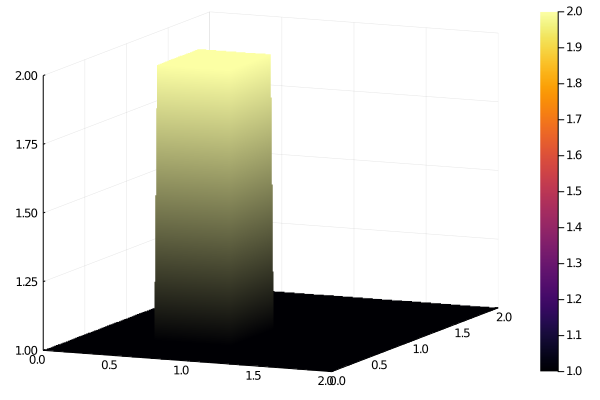

In [2]:
ss = plot(x,y,u₀, st=:surface)


$$u_{i,j}^{n+1} = u_{i,j}^n + \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)$$

In [3]:
function diffuse(nt)
    
    ###Assign initial conditions

    u₀ = ones(ny, nx)
    u₀[0.5 .≤ y .≤ 1 , 0.5 .≤ x .≤ 1] .= 2.0
    
    uⁿ⁺¹ = u₀
    row, col = size(u₀)
    
    uⁿ = zeros(row,col);
       
    for n in 1:nt
        
        uⁿ .= uⁿ⁺¹
        for j in 1:row
            for i in 1:col
                if j == 1
                    uⁿ⁺¹[j, i] = 1.0
                elseif j == row
                    uⁿ⁺¹[j, i] = 1.0
                elseif i == col
                    uⁿ⁺¹[j, i] = 1.0
                elseif i == 1
                    uⁿ⁺¹[j, i] = 1.0
                else
                    uⁿ⁺¹[j, i] = ( uⁿ[j, i] +
                            (ν*Δt/Δx^2*(uⁿ[j, i+1] - 2.0*uⁿ[j, i] + uⁿ[j, i - 1])) + 
                            (ν*Δt/Δy^2*(uⁿ[j+1, i] - 2.0*uⁿ[j, i] + uⁿ[j - 1, i])) )
                end
            end
        end
        
    end
    
    plot(x,y,uⁿ⁺¹,st=:surface, c=:redsblues, zlim=(1,2.5), clim=(1,2.5))
    
end
    


diffuse (generic function with 1 method)

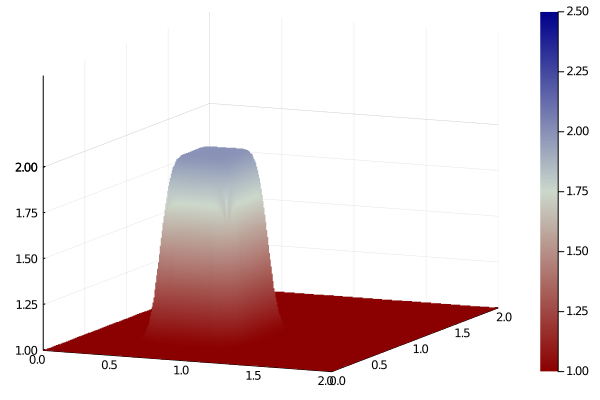

In [4]:
diffuse(10)

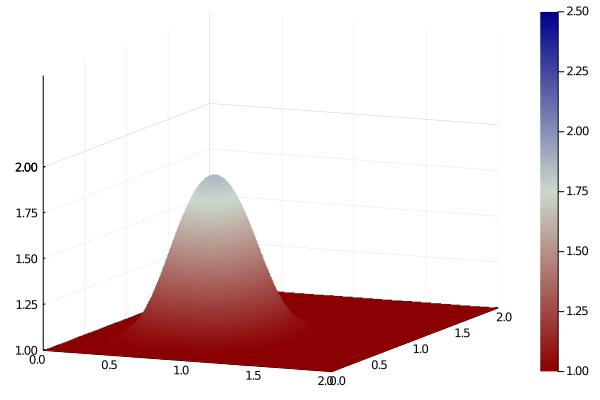

In [5]:
diffuse(100)

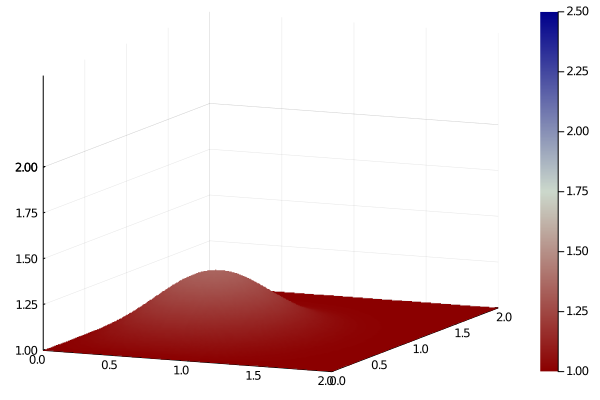

In [6]:
diffuse(500)

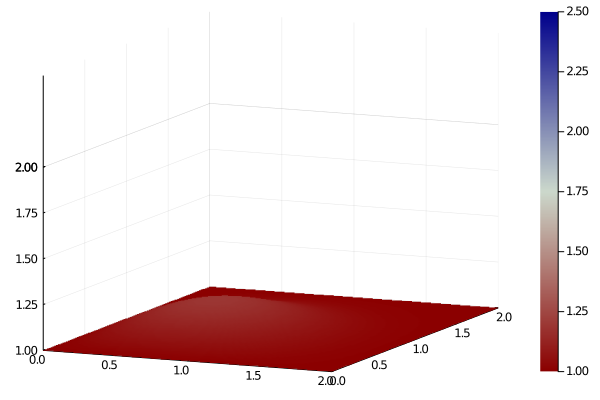

In [7]:
diffuse(1000)